In [1]:
import json
from tensorflow.keras.models import load_model
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
import collections
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.models import Model

In [2]:
word_to_index = {}
with open ("data/textFiles/word_to_idx.pkl", 'rb') as file:
    word_to_index = pd.read_pickle(file, compression=None)

index_to_word = {}
with open ("data/textFiles/idx_to_word.pkl", 'rb') as file:
    index_to_word = pd.read_pickle(file, compression=None)



print("Loading the model...")
model = load_model('model_checkpoints/model_14.h5')

vgg_model = ResNet50 (weights = 'vgg.h5', input_shape = (224, 224, 3))
vgg_model = Model (vgg_model.input, vgg_model.layers[-2].output)

Loading the model...


In [3]:
def predict_caption(photo):

    inp_text = "startseq"

    for i in range(80):
        sequence = [word_to_index[w] for w in inp_text.split() if w in word_to_index]
        sequence = pad_sequences([sequence], maxlen=80, padding='post')

        ypred = model.predict([photo, sequence])
        ypred = ypred.argmax()
        word = index_to_word[ypred]

        inp_text += (' ' + word)

        if word == 'endseq':
            break

    final_caption = inp_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

In [4]:
def preprocess_image (img):
    img = image.load_img(img, target_size=(224, 224))
    img = image.img_to_array(img)

    img = np.expand_dims(img, axis=0)

    img = preprocess_input(img)

    return img


In [5]:
def encode_image (img):
    img = preprocess_image(img)

    feature_vector = vgg_model.predict(img)
    # feature_vector = feature_vector.reshape((-1,))
    return feature_vector


In [8]:
def runModel(img_name):
    #img_name = input("enter the image name to generate:\t")

    print("Encoding the image ...")
    photo = encode_image(img_name).reshape((1, 2048))



    print("Running model to generate the caption...")
    caption = predict_caption(photo)

    img_data = plt.imread(img_name)
    plt.imshow(img_data)
    plt.axis("off")

    plt.show()
    print(caption)
    return caption

Encoding the image ...
Running model to generate the caption...


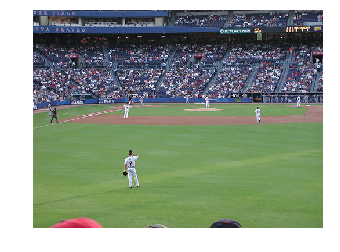

a soccer game is being played


'a soccer game is being played'

In [9]:
import cv2

runModel('D:/data/flicker/flickr30k-images/flickr30k-images/134206.jpg')

Encoding the image ...
Running model to generate the caption...
a brown dog is running through a field


'a brown dog is running through a field'

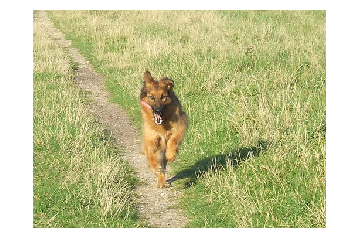

In [9]:
runModel('D:/data/flicker/Flickr8k and Flickr8kCN/Flicker8k_Dataset/240696675_7d05193aa0.jpg')

In [242]:
def readFile (path):
    with open(path, encoding="utf8") as file:
        data = file.read()
    return data;

In [243]:
data = readFile ("data/textFiles/30k_captions.txt")

captions = data.split('\n')
captions = captions[:-1]

In [244]:
content = {}
references={}
for line in captions:
    imageID, caption = line.split('\t')

    imageID = imageID.split('.')[0]

    if content.get(imageID) is None:
        content[imageID] = []
        references[imageID] = []

    content[imageID].append(caption)
    references[imageID].append(caption.split())

In [245]:
data_val = readFile ("data/textFiles/flickr30k_val.txt")
imageID_val=[]
imageID_val = data_val.split('.jpg\n')
imageID_val=imageID_val[:-1]

Encoding the image ...
Running model to generate the caption...
a man is standing on a horse in a rodeo
BLEU-1 Score on test data 1018148011: 50.000
Encoding the image ...
Running model to generate the caption...


d:\anaconda3\envs\tf-gpu\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


a man is sitting on a chair in a chair with a cat
BLEU-1 Score on test data 1029450589: 49.859
Encoding the image ...
Running model to generate the caption...


d:\anaconda3\envs\tf-gpu\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


a man in a blue shirt is sitting on a chair with a large white umbrella
BLEU-1 Score on test data 1029737941: 37.500
Encoding the image ...
Running model to generate the caption...
a woman in a pink dress is walking down a sidewalk
BLEU-1 Score on test data 103205630: 27.273
Encoding the image ...
Running model to generate the caption...


d:\anaconda3\envs\tf-gpu\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


a group of people are rowing in a lake
BLEU-1 Score on test data 10350842: 35.621
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is walking down the street
BLEU-1 Score on test data 1054620089: 63.636
Encoding the image ...
Running model to generate the caption...
a dog is running through the sand
BLEU-1 Score on test data 1056873310: 71.429
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is playing a game of bowling pins
BLEU-1 Score on test data 1072439304: 46.154
Encoding the image ...
Running model to generate the caption...
a group of people are sitting at a table with a large amount of food
BLEU-1 Score on test data 1073444492: 40.000
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is riding a bicycle on a trail
BLEU-1 Score on test data 1092437557: 38.462
Encoding the image ...
Running model to generate the caption...
a man is climbing a cliff
BLEU-1 Score on test d

a man in a blue shirt is sitting on a chair with a large amount of food
BLEU-1 Score on test data 1409723496: 44.371
Encoding the image ...
Running model to generate the caption...
a man in a black shirt is holding a microphone
BLEU-1 Score on test data 1410039760: 60.000
Encoding the image ...
Running model to generate the caption...
a surfer is riding a wave on a surfboard
BLEU-1 Score on test data 141126420: 62.280
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is sitting on a bench with a black umbrella
BLEU-1 Score on test data 141186473: 66.667
Encoding the image ...
Running model to generate the caption...
a group of people are sitting on a bench
BLEU-1 Score on test data 1432734769: 39.771
Encoding the image ...
Running model to generate the caption...
a man is standing on a roof overlooking a large body of water
BLEU-1 Score on test data 1436832881: 23.077
Encoding the image ...
Running model to generate the caption...
a man in a blue shi

a man in a blue shirt is holding a microphone
BLEU-1 Score on test data 2081446176: 40.000
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is walking down the street
BLEU-1 Score on test data 2082620071: 72.727
Encoding the image ...
Running model to generate the caption...
a dog is chewing a small dog
BLEU-1 Score on test data 2082663150: 64.412
Encoding the image ...
Running model to generate the caption...
a group of people are standing in front of a building
BLEU-1 Score on test data 2095478050: 18.182
Encoding the image ...
Running model to generate the caption...
a group of people are running in a race
BLEU-1 Score on test data 2102902012: 88.889
Encoding the image ...
Running model to generate the caption...
a man is sitting on a bench in front of a car
BLEU-1 Score on test data 210625425: 41.667
Encoding the image ...
Running model to generate the caption...
a man in a red shirt is holding a rifle
BLEU-1 Score on test data 2109370875: 40.00

a man in a black jacket and black pants is standing in front of a building
BLEU-1 Score on test data 2326795765: 31.250
Encoding the image ...
Running model to generate the caption...
a dog is running through a field
BLEU-1 Score on test data 233361142: 61.920
Encoding the image ...
Running model to generate the caption...
a man in a red shirt is singing into a microphone
BLEU-1 Score on test data 2334983049: 58.106
Encoding the image ...
Running model to generate the caption...
a dog is running through the snow
BLEU-1 Score on test data 2340206885: 42.857
Encoding the image ...
Running model to generate the caption...
a group of people are standing in a field
BLEU-1 Score on test data 234580030: 77.778
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is jumping over a hurdle
BLEU-1 Score on test data 2353119813: 45.455
Encoding the image ...
Running model to generate the caption...
a woman in a white shirt is cooking food
BLEU-1 Score on test data 

a man in a blue shirt is standing on a ladder
BLEU-1 Score on test data 2537601290: 54.545
Encoding the image ...
Running model to generate the caption...
a group of people are sitting on a bench
BLEU-1 Score on test data 2537665596: 44.444
Encoding the image ...
Running model to generate the caption...
a man in a black jacket and jeans is playing a guitar and singing
BLEU-1 Score on test data 2537801630: 21.429
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is standing next to a man wearing a blue shirt
BLEU-1 Score on test data 2537817814: 25.000
Encoding the image ...
Running model to generate the caption...
a group of people are standing around a large gathering of people
BLEU-1 Score on test data 2540751930: 30.668
Encoding the image ...
Running model to generate the caption...
a black dog is running through the water
BLEU-1 Score on test data 2541104331: 87.500
Encoding the image ...
Running model to generate the caption...
a woman in a blac

a child in a swing on a swing set
BLEU-1 Score on test data 2777021428: 55.556
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is holding a stick
BLEU-1 Score on test data 2793597468: 40.000
Encoding the image ...
Running model to generate the caption...
a woman in a blue jacket is walking along a path
BLEU-1 Score on test data 2800531753: 36.364
Encoding the image ...
Running model to generate the caption...
a man in a red shirt is standing next to a large amount of bananas
BLEU-1 Score on test data 2808838598: 49.894
Encoding the image ...
Running model to generate the caption...
a large crowd of people are watching a large crowd of people
BLEU-1 Score on test data 2833509990: 76.670
Encoding the image ...
Running model to generate the caption...
a woman in a blue dress is sitting on a bench
BLEU-1 Score on test data 2849169944: 33.204
Encoding the image ...
Running model to generate the caption...
a man is sitting on a chair in front of a large 

a man in a black shirt is singing into a microphone
BLEU-1 Score on test data 3037108254: 63.636
Encoding the image ...
Running model to generate the caption...
a group of people are walking through a field
BLEU-1 Score on test data 3041262779: 66.667
Encoding the image ...
Running model to generate the caption...
a man in a white shirt is holding a drink and smiling
BLEU-1 Score on test data 3046431231: 16.667
Encoding the image ...
Running model to generate the caption...
a man in a blue jacket is sitting on a chair with a cane
BLEU-1 Score on test data 3047788420: 78.571
Encoding the image ...
Running model to generate the caption...
a group of people are playing volleyball on a beach
BLEU-1 Score on test data 3048904615: 50.000
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is sitting on a rock
BLEU-1 Score on test data 3051022611: 49.805
Encoding the image ...
Running model to generate the caption...
a group of people are standing in a field


a large crowd of people are watching a large crowd of people
BLEU-1 Score on test data 3237799755: 58.333
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is holding a microphone
BLEU-1 Score on test data 3239891140: 70.000
Encoding the image ...
Running model to generate the caption...
a little girl in a pink dress is sitting on a bed with a pink blanket
BLEU-1 Score on test data 3245266444: 25.000
Encoding the image ...
Running model to generate the caption...
a man in a blue jacket is walking down the street
BLEU-1 Score on test data 3251234434: 31.597
Encoding the image ...
Running model to generate the caption...
a group of people are sitting at a table with a large amount of water
BLEU-1 Score on test data 3259222980: 56.130
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is sitting on a chair with a small child in a blue shirt
BLEU-1 Score on test data 3267720211: 47.368
Encoding the image ...
Running mod

a group of people are sitting at a table with a large amount of food
BLEU-1 Score on test data 339642119: 60.000
Encoding the image ...
Running model to generate the caption...
a black and white dog is running through a field
BLEU-1 Score on test data 3396817186: 70.000
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is riding a horse drawn carriage
BLEU-1 Score on test data 3405759441: 58.333
Encoding the image ...
Running model to generate the caption...
a group of people are sitting on a dock
BLEU-1 Score on test data 3410899419: 44.444
Encoding the image ...
Running model to generate the caption...
a dog is running through the grass
BLEU-1 Score on test data 3415165462: 49.536
Encoding the image ...
Running model to generate the caption...
a large group of people are sitting around a table
BLEU-1 Score on test data 3416617727: 60.000
Encoding the image ...
Running model to generate the caption...
a woman in a red tank top and black pants is hol

a red car is driving down a road
BLEU-1 Score on test data 3578841731: 66.187
Encoding the image ...
Running model to generate the caption...
a group of people are standing around a building
BLEU-1 Score on test data 3578945620: 77.778
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is sitting on a bench
BLEU-1 Score on test data 3579150322: 63.636
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is running in a field
BLEU-1 Score on test data 3580375310: 36.364
Encoding the image ...
Running model to generate the caption...
a man in a red shirt is riding a bicycle
BLEU-1 Score on test data 358114269: 80.000
Encoding the image ...
Running model to generate the caption...
a woman in a blue bathing suit is walking through the water
BLEU-1 Score on test data 3582920844: 53.669
Encoding the image ...
Running model to generate the caption...
a man in a red shirt is walking down a street
BLEU-1 Score on test data 3590

a man in a blue shirt is standing in front of a building
BLEU-1 Score on test data 375955411: 61.538
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is sitting on a chair with a cane
BLEU-1 Score on test data 377406355: 64.286
Encoding the image ...
Running model to generate the caption...
a man in a black jacket and jeans is walking down the street
BLEU-1 Score on test data 3776965455: 69.231
Encoding the image ...
Running model to generate the caption...
a soccer player in a red uniform is running in a stadium
BLEU-1 Score on test data 37791887: 50.000
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is sitting on a bench
BLEU-1 Score on test data 3783987753: 45.455
Encoding the image ...
Running model to generate the caption...
a woman in a black dress is walking down the street
BLEU-1 Score on test data 3788779998: 27.273
Encoding the image ...
Running model to generate the caption...
a man in a black shirt 

a crowd of people are walking down a street
BLEU-1 Score on test data 4074473431: 55.556
Encoding the image ...
Running model to generate the caption...
a group of people are dancing in a dance
BLEU-1 Score on test data 4082808690: 88.889
Encoding the image ...
Running model to generate the caption...
a man is sitting on a bench in a park
BLEU-1 Score on test data 4084139686: 70.000
Encoding the image ...
Running model to generate the caption...
a man in a black jacket and a black hat plays the guitar
BLEU-1 Score on test data 4089583280: 61.538
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is standing next to a machine
BLEU-1 Score on test data 4095232321: 46.002
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is walking on a dirt path
BLEU-1 Score on test data 4113033557: 41.667
Encoding the image ...
Running model to generate the caption...
a large crowd of people are watching a band
BLEU-1 Score on test d

a man in a black shirt is standing in front of a store
BLEU-1 Score on test data 4443536449: 53.846
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is holding a microphone
BLEU-1 Score on test data 4448923515: 40.000
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is holding a microphone
BLEU-1 Score on test data 4450689424: 50.000
Encoding the image ...
Running model to generate the caption...
a man in a black shirt is walking down the street
BLEU-1 Score on test data 4470667650: 41.505
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is sitting on a chair with a large child
BLEU-1 Score on test data 4477467862: 43.657
Encoding the image ...
Running model to generate the caption...
a man in a black jacket and black pants is standing in front of a building
BLEU-1 Score on test data 4477602852: 50.000
Encoding the image ...
Running model to generate the caption...
a man is si

a man in a black jacket and jeans is walking down the street
BLEU-1 Score on test data 4605605328: 61.538
Encoding the image ...
Running model to generate the caption...
a man in a black shirt is standing next to a man in a black shirt
BLEU-1 Score on test data 4616068657: 62.500
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is standing next to a building
BLEU-1 Score on test data 4617869592: 8.333
Encoding the image ...
Running model to generate the caption...
a woman in a black dress is walking down the street
BLEU-1 Score on test data 4619879173: 74.708
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is walking down the street
BLEU-1 Score on test data 4631136622: 72.727
Encoding the image ...
Running model to generate the caption...
a woman in a pink dress is sitting on a bench
BLEU-1 Score on test data 4631830645: 18.182
Encoding the image ...
Running model to generate the caption...
a man is sitting on 

a group of people are sitting at a table with a large amount of food
BLEU-1 Score on test data 4741878277: 31.184
Encoding the image ...
Running model to generate the caption...
a man in a black shirt and jeans is sitting on a bench with a woman sitting on a bench
BLEU-1 Score on test data 4742826670: 50.000
Encoding the image ...
Running model to generate the caption...
a man in a black jacket and jeans is standing outside a building
BLEU-1 Score on test data 474652272: 42.737
Encoding the image ...
Running model to generate the caption...
a man in a suit is standing in front of a microphone
BLEU-1 Score on test data 4749166996: 91.667
Encoding the image ...
Running model to generate the caption...
a man is sitting on a chair in front of a large stone wall
BLEU-1 Score on test data 4749855: 53.204
Encoding the image ...
Running model to generate the caption...
a group of people are standing in a park
BLEU-1 Score on test data 4751932433: 88.889
Encoding the image ...
Running model to 

Running model to generate the caption...
a group of people are standing outside of a building
BLEU-1 Score on test data 4882763253: 70.000
Encoding the image ...
Running model to generate the caption...
a man in a red shirt is standing in front of a large crowd of people
BLEU-1 Score on test data 4886280540: 50.000
Encoding the image ...
Running model to generate the caption...
a man is working on a roof
BLEU-1 Score on test data 4889084974: 14.286
Encoding the image ...
Running model to generate the caption...
a man is sitting on a chair with a bag of food
BLEU-1 Score on test data 4889307357: 58.333
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is sitting on a bench
BLEU-1 Score on test data 4893568355: 54.545
Encoding the image ...
Running model to generate the caption...
a man in a red shirt is standing next to a car
BLEU-1 Score on test data 4897113571: 41.667
Encoding the image ...
Running model to generate the caption...
a man in a blue sh

a man in a red shirt is standing in front of a large crowd of people
BLEU-1 Score on test data 505837388: 41.099
Encoding the image ...
Running model to generate the caption...
a group of people are standing outside of a store
BLEU-1 Score on test data 508838116: 50.000
Encoding the image ...
Running model to generate the caption...
a group of people are standing outside of a building
BLEU-1 Score on test data 5123250615: 36.193
Encoding the image ...
Running model to generate the caption...
a group of people are sitting around a table
BLEU-1 Score on test data 512616265: 39.771
Encoding the image ...
Running model to generate the caption...
a young girl in a white leotard is jumping into the air to catch a ball
BLEU-1 Score on test data 5138003138: 60.672
Encoding the image ...
Running model to generate the caption...
a woman in a black dress is walking down a road
BLEU-1 Score on test data 5142873217: 36.364
Encoding the image ...
Running model to generate the caption...
a group of p

a man in a blue shirt is sitting at a table with a large white tablecloth
BLEU-1 Score on test data 5932908042: 43.750
Encoding the image ...
Running model to generate the caption...
a group of people are standing in a village
BLEU-1 Score on test data 5958376440: 33.333
Encoding the image ...
Running model to generate the caption...
a basketball player in a blue uniform is dribbling the ball
BLEU-1 Score on test data 5968404576: 54.545
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is sitting on a bench
BLEU-1 Score on test data 599235529: 45.455
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is sitting on a bench
BLEU-1 Score on test data 6043197241: 54.545
Encoding the image ...
Running model to generate the caption...
a man in a red shirt is sitting on a chair with a cart in front of him
BLEU-1 Score on test data 6046473448: 50.000
Encoding the image ...
Running model to generate the caption...
a group of

a man is sitting on a bench in front of a building
BLEU-1 Score on test data 6685838035: 66.667
Encoding the image ...
Running model to generate the caption...
a person is walking on a rocky beach with mountains in the background
BLEU-1 Score on test data 674513893: 32.977
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is standing in front of a building
BLEU-1 Score on test data 675153: 23.077
Encoding the image ...
Running model to generate the caption...
a group of people are standing around a large round circle
BLEU-1 Score on test data 6788339456: 27.273
Encoding the image ...
Running model to generate the caption...
a group of people are riding a motorcycle
BLEU-1 Score on test data 6800484706: 66.187
Encoding the image ...
Running model to generate the caption...
a man in a blue jacket is walking through the snow
BLEU-1 Score on test data 6827875949: 62.288
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt

a group of people are dancing and dancing
BLEU-1 Score on test data 7718605530: 44.125
Encoding the image ...
Running model to generate the caption...
a man is sitting on a bench with a cane
BLEU-1 Score on test data 7719524174: 50.000
Encoding the image ...
Running model to generate the caption...
a man in a red shirt is riding a bicycle
BLEU-1 Score on test data 7772746168: 50.000
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is playing tennis
BLEU-1 Score on test data 7778073672: 55.556
Encoding the image ...
Running model to generate the caption...
a group of people are sitting at a table with a large amount of food
BLEU-1 Score on test data 7779718252: 20.000
Encoding the image ...
Running model to generate the caption...
a man in a blue shirt is sitting on a bench with a large number of people
BLEU-1 Score on test data 78171801: 52.941
Encoding the image ...
Running model to generate the caption...
a man in a red shirt is riding a bicycle
B

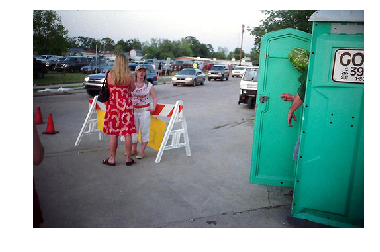

In [248]:
from nltk.translate.bleu_score import corpus_bleu


generated_captions=['a man in a blue shirt is sitting on a lawn bench in a field'.split()]
scores=[]
good=[]
bad=[]
for imageID in imageID_val:
    generated_captions=runModel('D:/data/flicker/flickr30k-images/flickr30k-images/'+imageID+'.jpg')
    generated_captions=[generated_captions.split()]
    #print('BLEU-1 Score on test data: {:.3f}'.format(corpus_bleu([references[imageID]], generated_captions, weights=(1,0,0,0)) * 100))
    score=corpus_bleu([references[imageID]], generated_captions, weights=(1,0,0,0)) * 100
    print('BLEU-1 Score on test data '+imageID+': {:.3f}'.format(score))
    scores.append(score)
    if (score>50):
        good.append(imageID)
    if (score<30):
        bad.append(imageID)

In [249]:
np.mean(scores)

50.41231928700583